Iteration 0: MSE = 2811039713.245842, RMSE = 53019.23908588129, R-squared = -3.572747039145675
Iteration 10: MSE = 157683982.0886138, RMSE = 12557.228280500989, R-squared = 0.7434938543134881
Iteration 20: MSE = 152040217.04705322, RMSE = 12330.458914697912, R-squared = 0.7526746246035069
Iteration 30: MSE = 147450660.4272944, RMSE = 12142.92635353169, R-squared = 0.7601405032764768
Iteration 40: MSE = 143043122.4262284, RMSE = 11960.063646412105, R-squared = 0.76731029040162
Iteration 50: MSE = 138810123.75904608, RMSE = 11781.770824415406, R-squared = 0.7741961526079975
Iteration 60: MSE = 134744752.55016407, RMSE = 11607.960740378307, R-squared = 0.7808093335142814
Iteration 70: MSE = 130840370.72404699, RMSE = 11438.547579305992, R-squared = 0.7871606313458072
Iteration 80: MSE = 127090603.07409441, RMSE = 11273.446814266452, R-squared = 0.7932604167163262
Iteration 90: MSE = 123489326.8529588, RMSE = 11112.575167482953, R-squared = 0.7991186495615422
Iteration 100: MSE = 120030661

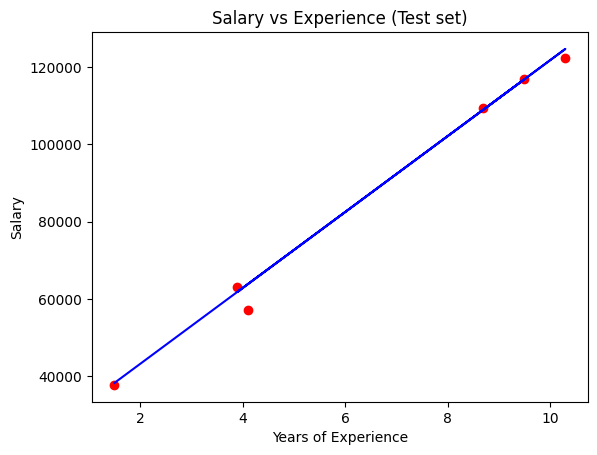

In [ ]:
# Importing necessary libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
dataset = pd.read_csv('Salary_Data.csv')

# Extract independent variable 'YearsExperience' into X and dependent variable 'Salary' into y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize theta with zeros (including the bias term)
theta = np.zeros(X_train.shape[1] + 1)
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations
print_error = 10

# Add a column of ones to X_train for the bias term
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iterations, print_error_iterations):
    m = len(y)
    for iteration in range(num_iterations):
        h = np.dot(X, theta)  # Hypothesis/prediction
        error = h - y  # Error

        gradient = (1 / m) * np.dot(X.T, error)  # Gradient
        theta -= alpha * gradient  # Update theta using gradient descent

        if iteration % print_error == 0:
            mse = mean_squared_error(y, np.dot(X, theta))
            rmse = np.sqrt(mse)
            r_squared = r2_score(y, np.dot(X, theta))
            print(f"Iteration {iteration}: MSE = {mse}, RMSE = {rmse}, R-squared = {r_squared}")

    return theta

# Train the model using gradient descent
theta = gradient_descent(X_train_with_bias, y_train, theta, alpha, num_iterations, print_error_iterations)

# Print the best theta and alpha
print("\nBest Theta:", theta)
print("Best Alpha (Learning Rate):", alpha)

# Gradient descent equation
print("\nGradient Descent Equation:")
print("theta_new = theta_old - alpha * (1 / m) * X_transpose * (hypothesis - y)")

# Predictions on the test set
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = np.dot(X_test_with_bias, theta)

# Calculate evaluation metrics for Training Set
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y_pred_train = np.dot(X_train_with_bias, theta)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r_squared_train = r2_score(y_train, y_pred_train)

# Calculate evaluation metrics for Test Set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Print evaluation metrics for Training Set
print("\nTraining Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (Coefficient of Determination):", r_squared_train)

# Print evaluation metrics for Test Set
print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (Coefficient of Determination):", r_squared_test)


# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
